In [ ]:
NET = 'multi_lstm_init'

import tensorflow as tf
import datasets
import pickle
import os
import copy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

if NET == 'dilation':
    import experiments.dilation as experiments
if NET == 'segnet':
    import experiments.segnet as experiments
elif NET == 'lstm':
    import experiments.lstm as experiments
elif NET == 'coloring':
    import experiments.coloring as experiments
elif NET == 'crossing':
    import experiments.crossing as experiments
elif NET == 'unet':
    import experiments.unet as experiments
elif NET == 'multi_lstm':
    import experiments.multi_lstm as experiments
elif NET == 'multi_lstm_init':
    import experiments.multi_lstm_init as experiments
elif NET == 'FF':
    import experiments.FF as experiments
elif NET == 'optimal_lstm':
    import experiments.optimal_lstm as experiments

In [2]:
output_path = '/om/user/xboix/share/insideness/' + NET + '/'
run_opt = experiments.get_best_of_the_family(output_path)
opt_datasets = datasets.get_datasets(output_path)

{0: {'testloose': 1.0, 'val': 1.0, 'trainloose': 1.0, 'test': 1.0, 'train': 1.0, 'ID': 0, 'valloose': 1.0}, 1: {'testloose': 1.0, 'val': 1.0, 'test': 1.0, 'train': 1.0, 'ID': 14, 'valloose': 1.0, 'trainloose': 1.0}, 2: {'testloose': 0.9999996321134673, 'val': 0.9998000168406871, 'test': 0.9995053048164365, 'train': 0.9997684405523746, 'ID': 68, 'valloose': 0.9999998794657167, 'trainloose': 0.9999998563987793}, 3: {'testloose': 0.9999998650915416, 'val': 0.9992000673627484, 'test': 0.9997894914112496, 'train': 0.9998000168406871, 'ID': 98, 'valloose': 0.9999995045125505, 'trainloose': 0.9999998745672548}, 4: {'testloose': 0.9999935731176336, 'val': 0.9994000505220613, 'test': 0.9993263725159987, 'train': 0.9995263556753116, 'ID': 121, 'valloose': 0.9999996414486508, 'trainloose': 0.9999996795723357}, 5: {'testloose': 0.9999984714590607, 'val': 0.9990000842034354, 'test': 0.9987895756146851, 'train': 0.998989558773998, 'ID': 176, 'valloose': 0.9999985112490257, 'trainloose': 0.9999991415

In [4]:
import matplotlib.pyplot as plt

for opt in [run_opt[-2]]:
    
    for opt_data in [opt_datasets[52]]:
        with open(opt.log_dir_base + opt.name + '/results/activations_DATA' + opt_data.log_name + '.pkl', 'rb') as f:
            data_point = pickle.load(f)
        
        print('--------------------')
        print(opt.name)
        print(opt_data.log_name)

--------------------
ID248_MultiLSTMInit_D52
ID52_DATA_C6_D0


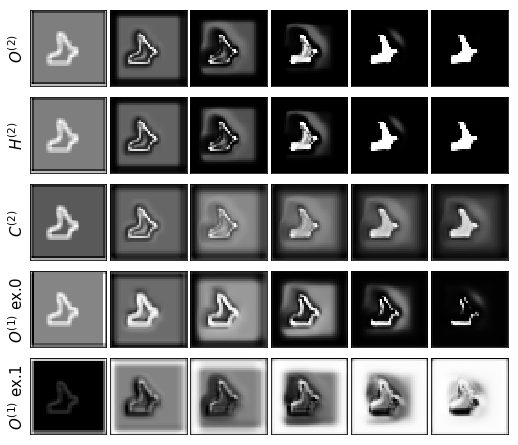

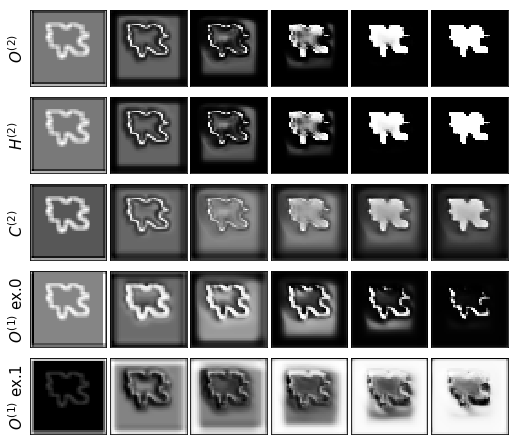

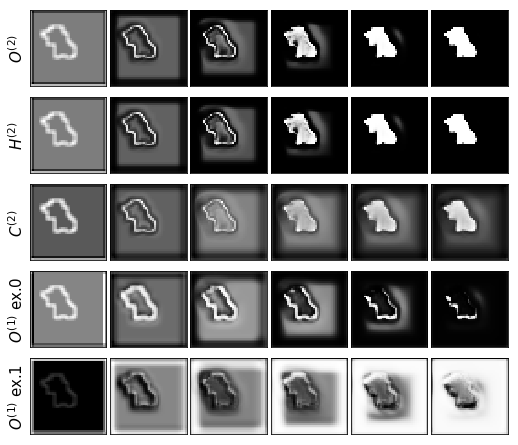

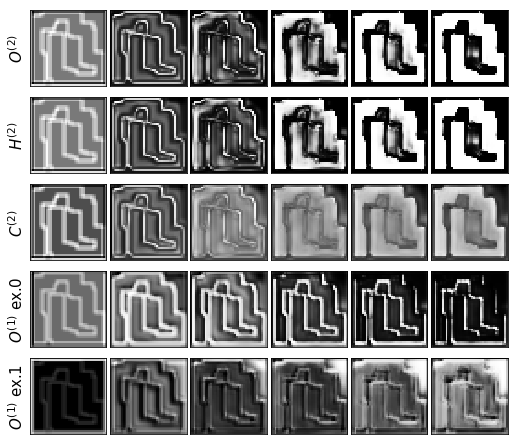

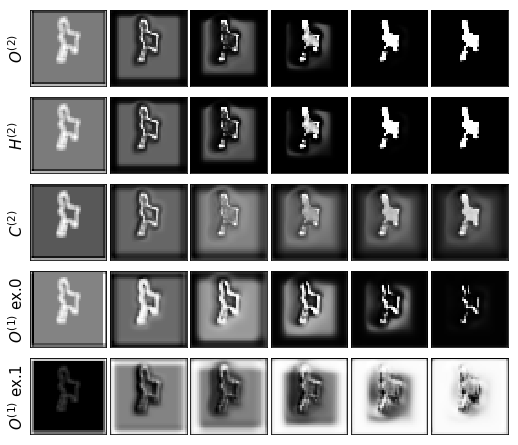

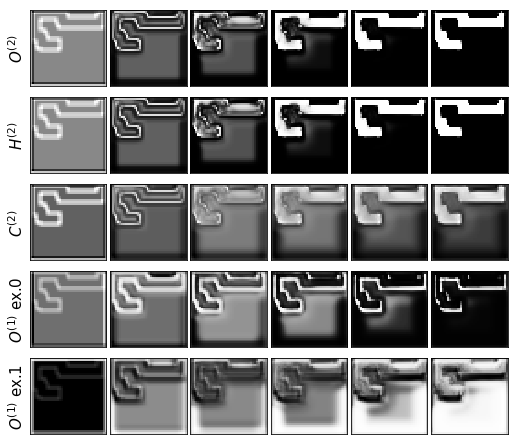

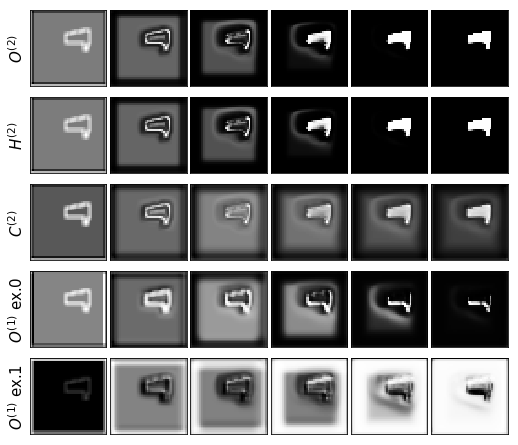

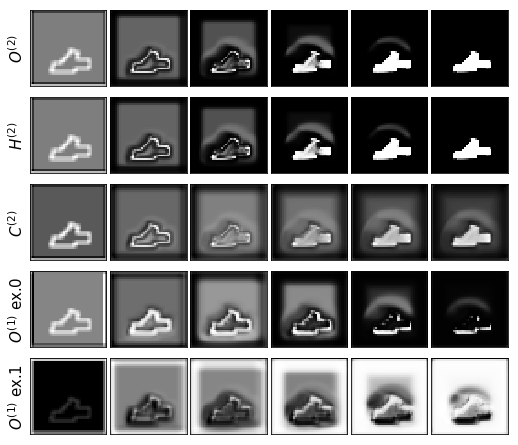

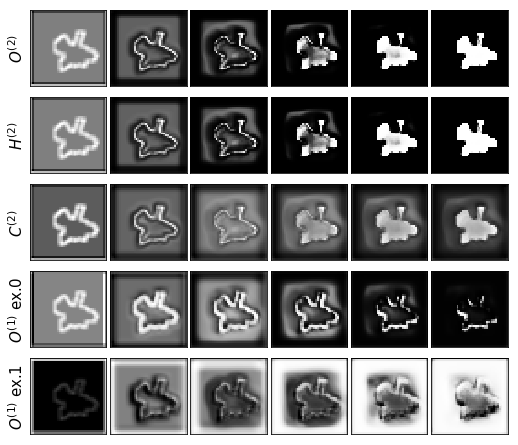

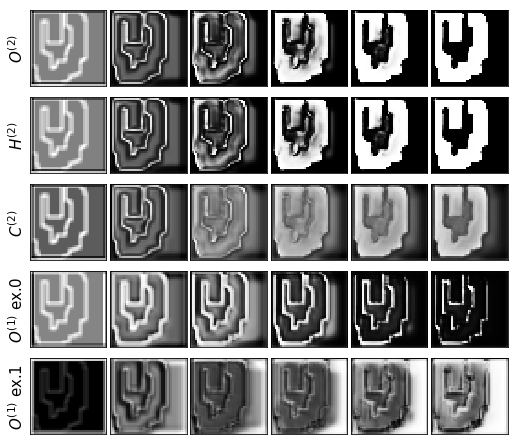

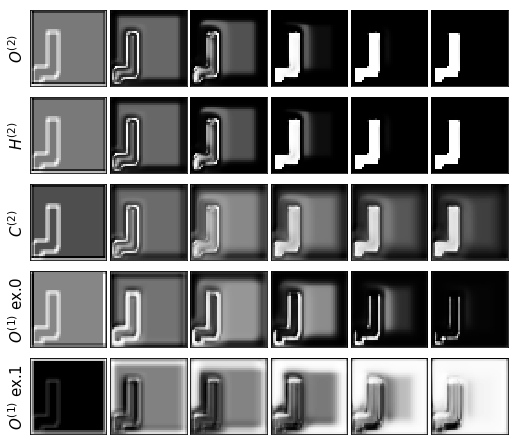

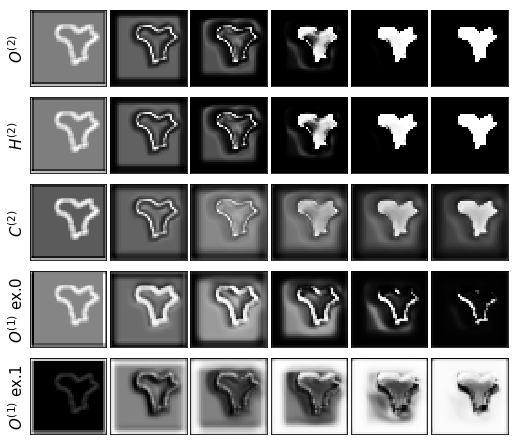

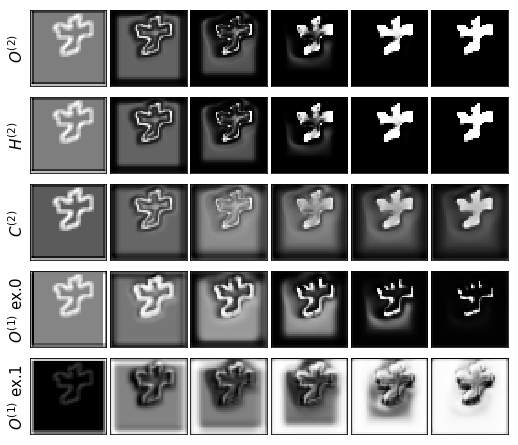

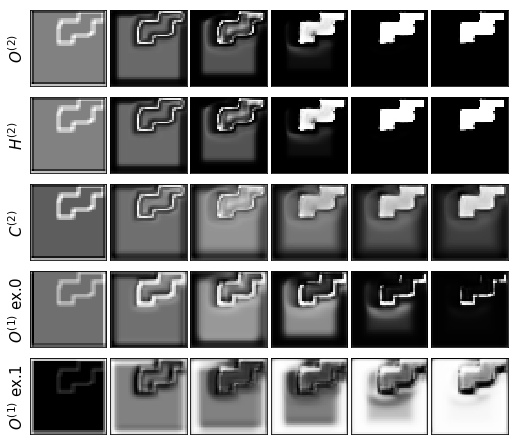

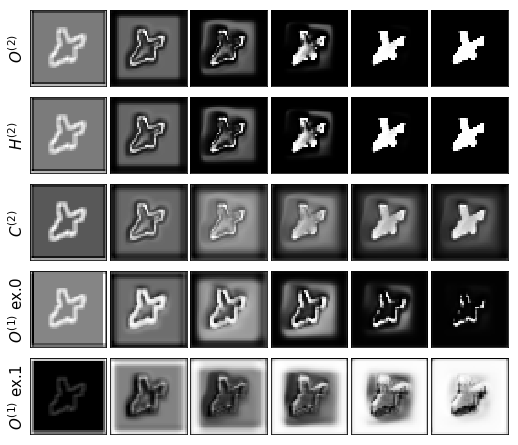

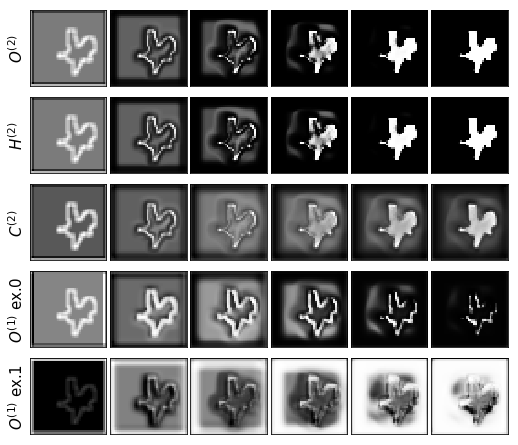

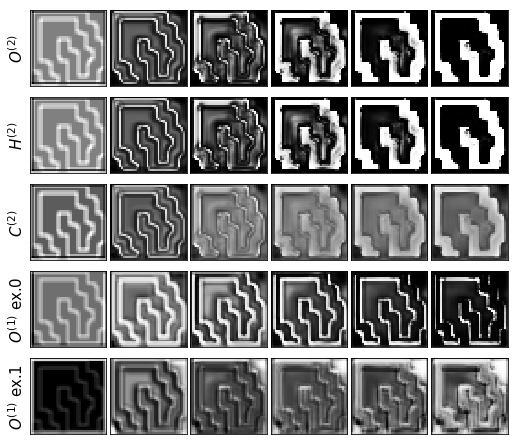

In [5]:
plt.rcParams.update({'font.size': 15})
for num_image in range(0,17):
    fig = plt.figure(figsize=(10, 8))
    columns = 7
    rows=5
    plt.subplots_adjust(wspace=0.05, hspace=0)    


    ax = []

    #BATCH, SAVE, LAYER, TIME, C/H
    im_count = 1
    for k in range(0,24,4):#,columns*(rows-1)):
        
        #OUTPUT SECOND LAYER
        ax.append( fig.add_subplot(rows, columns, im_count) )
        plt.imshow(np.squeeze(-data_point[0][0][3][k][num_image,:,:,0]), cmap='gray') #15:45
        if k==0:
            plt.ylabel('$O^{(2)}$' )
            plt.tick_params(labelsize=18)
        ax[-1].get_xaxis().set_ticks([])
        ax[-1].get_yaxis().set_ticks([])
        
        #HIDDEN SECOND LAYER
        ax.append( fig.add_subplot(rows, columns, columns+im_count) )
        plt.imshow(np.squeeze(-data_point[0][0][1][k][1][num_image,:,:,0]), cmap='gray') #15:45
        if k==0:
            plt.ylabel('$H^{(2)}$')
        ax[-1].get_xaxis().set_ticks([])
        ax[-1].get_yaxis().set_ticks([])
        
        ''' 
        ax.append( fig.add_subplot(rows, columns, 2*columns+im_count) )
        plt.imshow(np.squeeze(data_point[0][0][1][k][1][num_image,:,:,1]), cmap='gray') #15:45
        ax[-1].get_xaxis().set_ticks([])
        ax[-1].get_yaxis().set_ticks([])
        '''
        
        #C SECOND LAYER
        ax.append( fig.add_subplot(rows, columns, 2*columns+im_count) )
        plt.imshow(np.squeeze(-data_point[0][0][1][k][0][num_image,:,:,0]), cmap='gray') #15:45
        if k==0:
            plt.ylabel('$C^{(2)}$')
        ax[-1].get_xaxis().set_ticks([])
        ax[-1].get_yaxis().set_ticks([])
        ''' 
        ax.append( fig.add_subplot(rows, columns, 4*columns+im_count) )
        plt.imshow(np.squeeze(data_point[0][0][1][k][0][num_image,:,:,1]), cmap='gray') #15:45
        ax[-1].get_xaxis().set_ticks([])
        ax[-1].get_yaxis().set_ticks([])
        ''' 
        for kk in range(2):
            #OUTPUT FIRST LAYER
            ax.append( fig.add_subplot(rows, columns, (kk+3)*columns+im_count) )
            plt.imshow(np.squeeze(-data_point[0][0][2][k][num_image,:,:,2*kk]), cmap='gray') #15:45
            if k==0:
                plt.ylabel('$O^{(1)}$ ex.'+ str(kk) )
            ax[-1].get_xaxis().set_ticks([])
            ax[-1].get_yaxis().set_ticks([])
        
        im_count+=1
    fig.savefig('./fig/lstm_vis/'+ str(num_image) + '.pdf', format='pdf', bbox_inches='tight',dpi=1000)


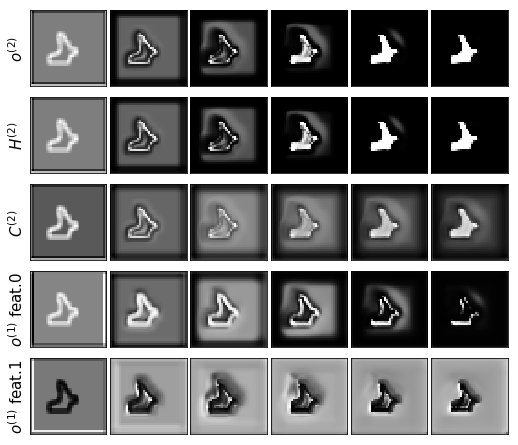

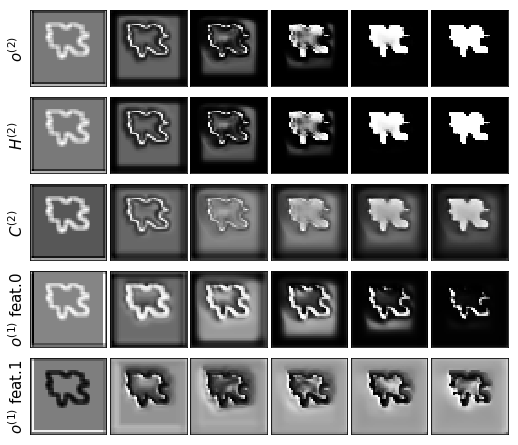

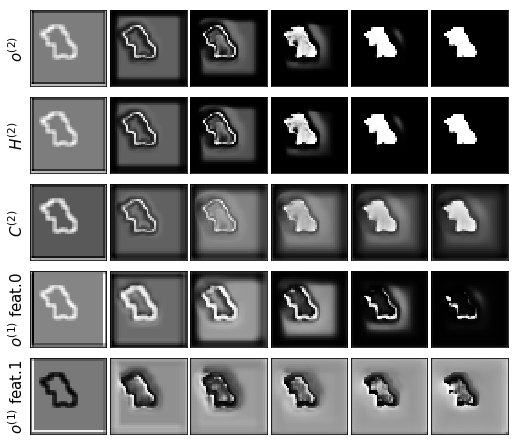

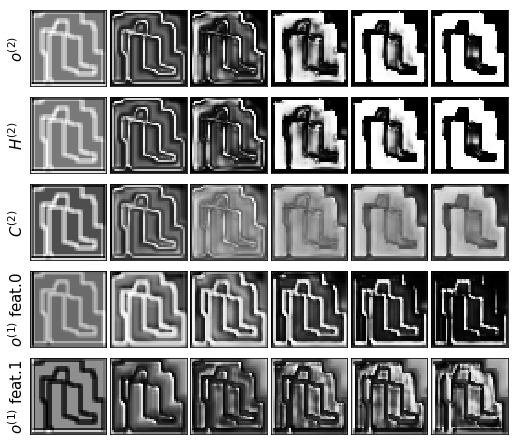

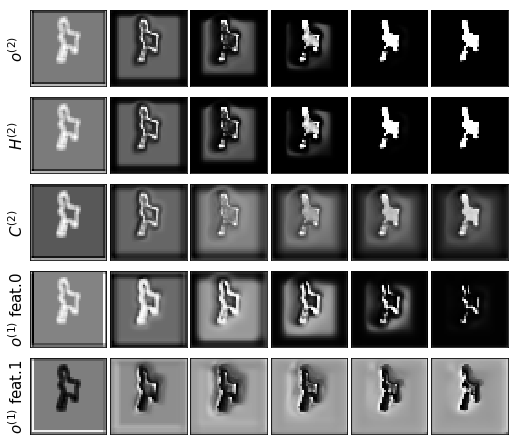

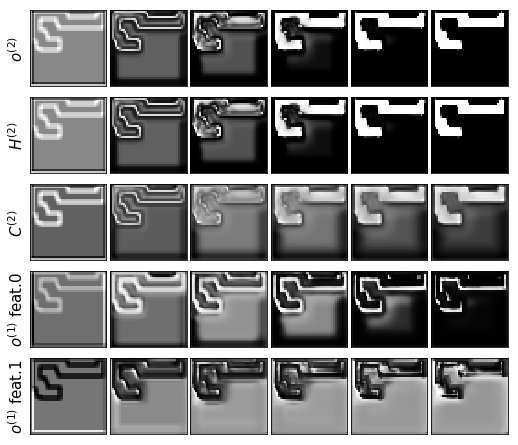

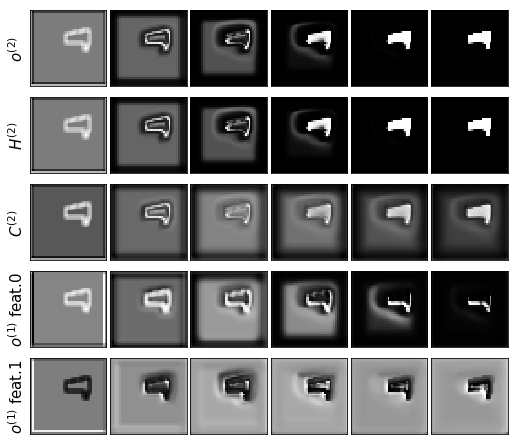

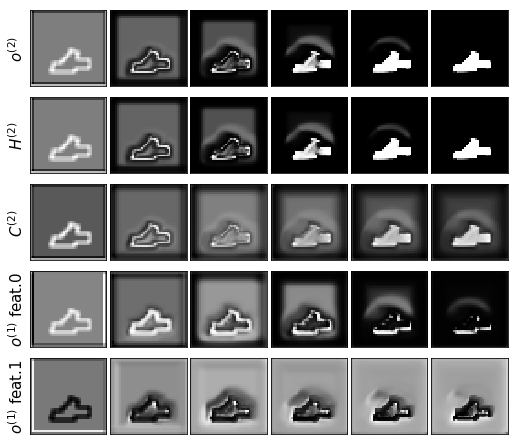

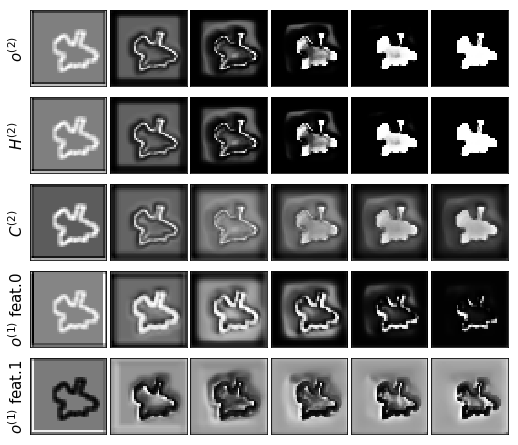

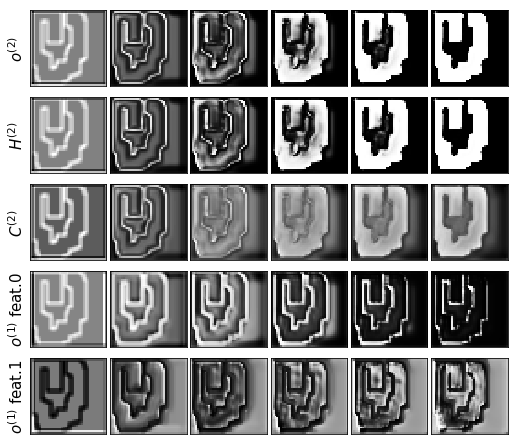

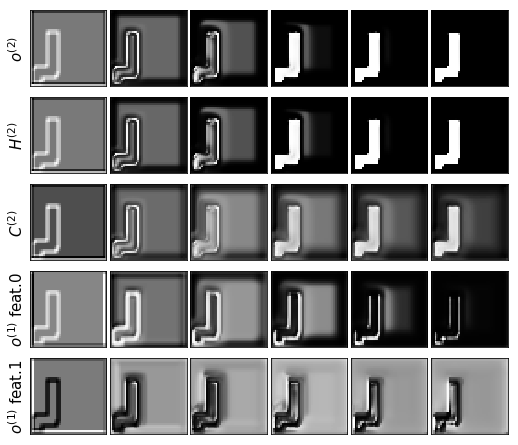

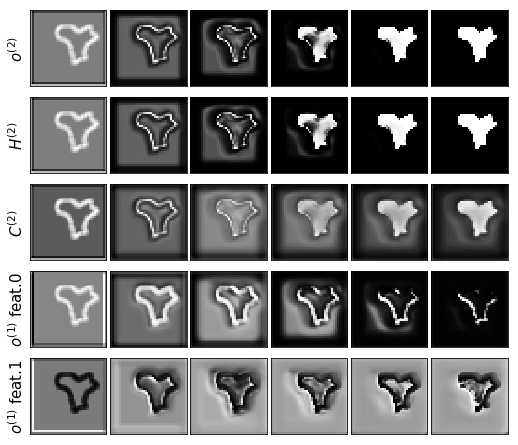

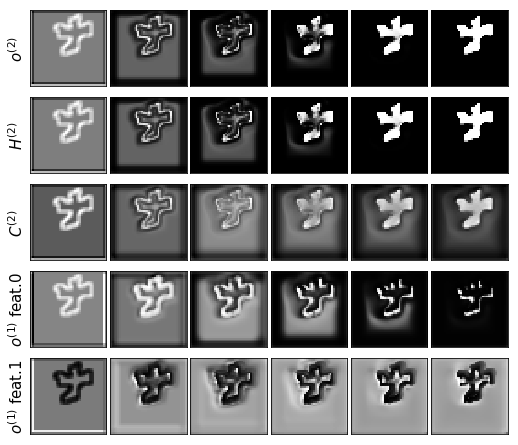

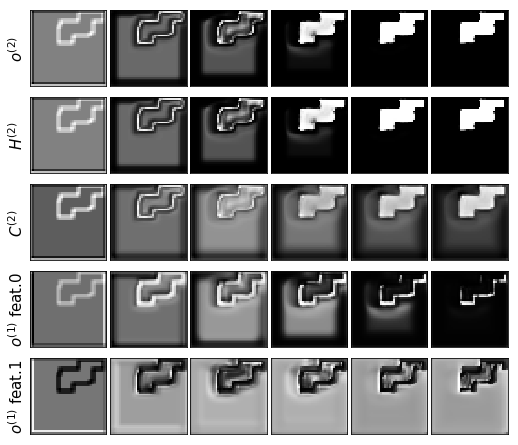

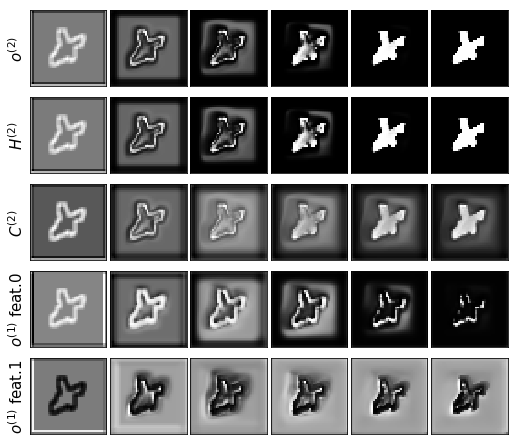

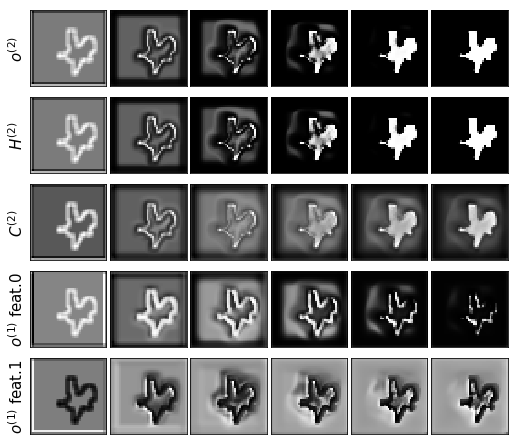

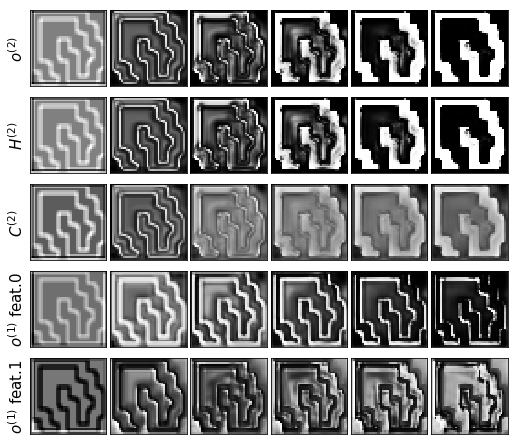

In [6]:
plt.rcParams.update({'font.size': 15})
for num_image in range(0,17):
    fig = plt.figure(figsize=(10, 8))
    columns = 7
    rows=5
    plt.subplots_adjust(wspace=0.05, hspace=0)    


    ax = []

    #BATCH, SAVE, LAYER, TIME, C/H
    im_count = 1
    for k in range(0,24,4):#,columns*(rows-1)):
        
        #OUTPUT SECOND LAYER
        ax.append( fig.add_subplot(rows, columns, im_count) )
        plt.imshow(np.squeeze(-data_point[0][0][3][k][num_image,:,:,0]), cmap='gray') #15:45
        if k==0:
            plt.ylabel('$o^{(2)}$' )
            plt.tick_params(labelsize=18)
        ax[-1].get_xaxis().set_ticks([])
        ax[-1].get_yaxis().set_ticks([])
        
        #HIDDEN SECOND LAYER
        ax.append( fig.add_subplot(rows, columns, columns+im_count) )
        plt.imshow(np.squeeze(-data_point[0][0][1][k][1][num_image,:,:,0]), cmap='gray') #15:45
        if k==0:
            plt.ylabel('$H^{(2)}$')
        ax[-1].get_xaxis().set_ticks([])
        ax[-1].get_yaxis().set_ticks([])
        
        ''' 
        ax.append( fig.add_subplot(rows, columns, 2*columns+im_count) )
        plt.imshow(np.squeeze(data_point[0][0][1][k][1][num_image,:,:,1]), cmap='gray') #15:45
        ax[-1].get_xaxis().set_ticks([])
        ax[-1].get_yaxis().set_ticks([])
        '''
        
        #C SECOND LAYER
        ax.append( fig.add_subplot(rows, columns, 2*columns+im_count) )
        plt.imshow(np.squeeze(-data_point[0][0][1][k][0][num_image,:,:,0]), cmap='gray') #15:45
        if k==0:
            plt.ylabel('$C^{(2)}$')
        ax[-1].get_xaxis().set_ticks([])
        ax[-1].get_yaxis().set_ticks([])
        ''' 
        ax.append( fig.add_subplot(rows, columns, 4*columns+im_count) )
        plt.imshow(np.squeeze(data_point[0][0][1][k][0][num_image,:,:,1]), cmap='gray') #15:45
        ax[-1].get_xaxis().set_ticks([])
        ax[-1].get_yaxis().set_ticks([])
        ''' 
        for kk in range(2):
            #OUTPUT FIRST LAYER
            ax.append( fig.add_subplot(rows, columns, (kk+3)*columns+im_count) )
            plt.imshow(np.squeeze(-data_point[0][0][2][k][num_image,:,:,kk]), cmap='gray') #15:45
            if k==0:
                plt.ylabel('$o^{(1)}$ feat.'+ str(kk) )
            ax[-1].get_xaxis().set_ticks([])
            ax[-1].get_yaxis().set_ticks([])
        
        im_count+=1
    fig.savefig('./fig/lstm_vis/complete'+ str(num_image) + '.pdf', format='pdf', bbox_inches='tight',dpi=1000)


In [8]:
import matplotlib.pyplot as plt

for opt in [run_opt[0]]:
    
    for opt_data in [opt_datasets[52]]:
        with open(opt.log_dir_base + opt.name + '/results/activations_DATA' + opt_data.log_name + '.pkl', 'rb') as f:
            data_point = pickle.load(f)
        
        print('--------------------')
        print(opt.name)
        print(opt_data.log_name)

FileNotFoundError: [Errno 2] No such file or directory: '/om/user/xboix/share/insideness/multi_lstm_init/ID0_Coloring/results/activations_DATAID52_DATA_C6_D0.pkl'

In [ ]:
plt.rcParams.update({'font.size': 15})
for num_image in range(0,17):
    fig = plt.figure(figsize=(10, 5))
    columns = 7
    rows=3
    plt.subplots_adjust(wspace=0.05, hspace=0)    


    ax = []

    #BATCH, SAVE, LAYER, TIME, C/H
    im_count = 1
    for k in range(0,24,4):#,columns*(rows-1)):
        
        #OUTPUT SECOND LAYER
        ax.append( fig.add_subplot(rows, columns, im_count) )
        plt.imshow(np.squeeze(-data_point[0][0][1][k][num_image,:,:,0]), cmap='gray') #15:45
        if k==0:
            plt.ylabel('$O^{(1)}$' )
            plt.tick_params(labelsize=18)
        ax[-1].get_xaxis().set_ticks([])
        ax[-1].get_yaxis().set_ticks([])
        
        #HIDDEN SECOND LAYER
        ax.append( fig.add_subplot(rows, columns, columns+im_count) )
        plt.imshow(np.squeeze(-data_point[0][0][0][k][1][num_image,:,:,0]), cmap='gray') #15:45
        if k==0:
            plt.ylabel('$H^{(1)}$')
        ax[-1].get_xaxis().set_ticks([])
        ax[-1].get_yaxis().set_ticks([])
        
        ''' 
        ax.append( fig.add_subplot(rows, columns, 2*columns+im_count) )
        plt.imshow(np.squeeze(data_point[0][0][1][k][1][num_image,:,:,1]), cmap='gray') #15:45
        ax[-1].get_xaxis().set_ticks([])
        ax[-1].get_yaxis().set_ticks([])
        '''
        
        #C SECOND LAYER
        ax.append( fig.add_subplot(rows, columns, 2*columns+im_count) )
        plt.imshow(np.squeeze(-data_point[0][0][0][k][0][num_image,:,:,0]), cmap='gray') #15:45
        if k==0:
            plt.ylabel('$C^{(1)}$')
        ax[-1].get_xaxis().set_ticks([])
        ax[-1].get_yaxis().set_ticks([])
        ''' 
        ax.append( fig.add_subplot(rows, columns, 4*columns+im_count) )
        plt.imshow(np.squeeze(data_point[0][0][1][k][0][num_image,:,:,1]), cmap='gray') #15:45
        ax[-1].get_xaxis().set_ticks([])
        ax[-1].get_yaxis().set_ticks([])
        
        for kk in range(2):
            #OUTPUT FIRST LAYER
            ax.append( fig.add_subplot(rows, columns, (kk+3)*columns+im_count) )
            plt.imshow(np.squeeze(data_point[0][0][2][k][num_image,:,:,kk]), cmap='gray') #15:45
            if k==0:
                plt.ylabel('$o^{(1)}$ feat.'+ str(kk) )
            ax[-1].get_xaxis().set_ticks([])
            ax[-1].get_yaxis().set_ticks([])
        ''' 
        im_count+=1
    fig.savefig('./fig/lstm_vis/math'+ str(num_image) + '.pdf', format='pdf', bbox_inches='tight', dpi=1000)


In [ ]:
for i in range(0,4,2):
    print(i)